# Predicting Time Series Data with Machine Learning, Generative AI, and Deep Learning

https://medium.com/@palashm0002/predicting-time-series-data-with-machine-learning-generative-ai-and-deep-learning-36bf99ad6f5e

Librerias

pip install tensorflow 

pip install keras 

pip install yfinance 

In [287]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.12.0


**Data Acquisition from yfinance**


yfinance is a Python library that allows users to access financial data from Yahoo Finance. It provides a convenient way to download historical market data, including stock prices, dividends, and splits

In [289]:
# Fetch AAPL data
data = yf.download('AAPL', start='2020-01-01', end='2024-06-28')
data_predict = yf.download('AAPL', start='2024-07-01', end='2024-07-13')

# Display the first few rows of the dataframe
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


In [290]:
time_series_data= data.copy()
time_series_data.info()
#Dataframe real values to vaidate forescating
data_predict_reset = data_predict.copy()
data_predict_reset = data_predict_reset[['Close']]
data_predict_reset=data_predict_reset.reset_index()
dates = pd.date_range(start='2024-07-01', periods=10, freq='B')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1129 entries, 2020-01-02 to 2024-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1129 non-null   float64
 1   High       1129 non-null   float64
 2   Low        1129 non-null   float64
 3   Close      1129 non-null   float64
 4   Adj Close  1129 non-null   float64
 5   Volume     1129 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 61.7 KB


In [291]:
time_series_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03
mean,145.385669,147.039555,143.856180,145.511603,143.897694,9.526231e+07
std,34.451168,34.580668,34.332078,34.451158,34.904257,5.337604e+07
min,57.020000,57.125000,53.152500,56.092499,54.632904,2.404830e+07
25%,126.529999,127.889999,125.080002,126.110001,123.998459,6.013390e+07
50%,148.809998,150.229996,147.330002,148.910004,147.046356,8.054620e+07
75%,172.300003,173.899994,170.839996,172.619995,171.282562,1.120048e+08
max,217.589996,220.199997,213.000000,216.669998,216.669998,4.265100e+08


# 1. Machine Learning Approaches
# 1.1. ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is a classical statistical method for time series forecasting. It combines autoregressive (AR) models, differencing (to make the data stationary), and moving average (MA) models



model = ARIMA(time_series_data['Close'], order=(5, 1, 0)

order=(5, 1, 0): This is a tuple specifying the ARIMA model order (p, d, q).

1. p=5: The autoregressive (AR) model order, indicating the number of lagged observations to include in the model. Here, it's 5, meaning the model considers the previous 5 closing prices.

2. d=1: The differencing order, indicating the number of times to difference the data to make it stationary. Here, d=1 means differencing the data once.
Estacionariedad de la serie temporal: La serie temporal debe ser estacionaria, lo que significa que sus propiedades estadísticas (media, varianza, autocorrelación) no cambian con el tiempo. Si la serie no es estacionaria, se debe aplicar un proceso de diferenciación (elegir d) para transformarla en estacionaria antes de ajustar el modelo ARIMA.

3. q=0: The moving average (MA) model order, indicating the number of lagged forecast errors to include in the model. Here, q=0 means no MA component.

In [296]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# Load your time series data - The field date is Index. for example already Date is Index

# Fit ARIMA model
model = ARIMA(time_series_data['Close'], order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()
# Make predictions - Windows 10- Forescat to 10 values
predictions = model_fit.forecast(steps=10)
#print(predictions)


/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_m

In [297]:
#Created DataFreme forecat values
series = pd.Series(predictions, name="Arima")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
arima_serie = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
arima_serie = arima_serie[['Date','Close','Arima']]
arima_serie

,Date,Close,Arima
0,2024-07-01,216.750000,213.963996
1,2024-07-02,220.270004,213.886423
2,2024-07-03,221.550003,213.878574
3,2024-07-04,NaN,213.929407
4,2024-07-05,226.339996,213.939843
5,2024-07-08,227.820007,213.937412
6,2024-07-09,228.679993,213.935528
7,2024-07-10,232.979996,213.935244
8,2024-07-11,227.570007,213.935896
9,2024-07-12,230.539993,213.936044


# 1.2 SARIMA 
SARIMA extends ARIMA by considering seasonal effects. It’s useful for data with seasonal patterns, such as monthly sales data

In [301]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data

# Fit SARIMA model
model_sarima = SARIMAX(time_series_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # (p,d,q) (P,D,Q,s)
model_fit = model_sarima.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=10)
#print(predictions)

/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/wilfredysantamariaruiz/opt/anaconda3/envs/my_env1/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: Fut

In [302]:
predictions

1129    214.195712
1130    214.135300
1131    214.034667
1132    214.030008
1133    214.336108
1134    214.252679
1135    214.456509
1136    214.641414
1137    214.940663
1138    215.332421
Name: predicted_mean, dtype: float64

In [299]:
#Created DataFreme forecat values
series = pd.Series(predictions, name="Sarima")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
sarima_serie = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
sarima_serie = sarima_serie[['Date','Close','Sarima']]
sarima_serie

,Date,Close,Sarima
0,2024-07-01,216.750000,214.195712
1,2024-07-02,220.270004,214.135300
2,2024-07-03,221.550003,214.034667
3,2024-07-04,NaN,214.030008
4,2024-07-05,226.339996,214.336108
5,2024-07-08,227.820007,214.252679
6,2024-07-09,228.679993,214.456509
7,2024-07-10,232.979996,214.641414
8,2024-07-11,227.570007,214.940663
9,2024-07-12,230.539993,215.332421


# 2. Generative AI Approaches

# 2.1 GANs (Generative Adversarial Networks)
GANs consist of a generator and a discriminator. For time series prediction, GANs can generate plausible future sequences by learning the underlying data distribution


In [311]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Reshape,Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data
# Prepare data for GAN
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

X_train, y_train = create_dataset(scaled_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# GAN components
def build_generator():
    model = Sequential()
    model.add(Dense(100, input_dim=time_step))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(time_step, activation='tanh'))
    model.add(Reshape((time_step, 1)))
    return model

def build_discriminator():
    model = Sequential()
    model.add(LSTM(50, input_shape=(time_step, 1)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates data
z = Input(shape=(time_step,))
generated_data = generator(z)

# For the combined model, we will only train the generator
discriminator.trainable = False

# The discriminator takes generated data as input and determines validity
validity = discriminator(generated_data)

# The combined model (stacked generator and discriminator)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
epochs = 100
batch_size = 2
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of real data
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, time_step))
    gen_data = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_data, valid)
    d_loss_fake = discriminator.train_on_batch(gen_data, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, time_step))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = combined.train_on_batch(noise, valid)

    # Print the progress
    if epoch % 1 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Make predictions
noise = np.random.normal(0, 1, (1, time_step))
generated_prediction = generator.predict(noise)
dim1, dim2, dim3 = generated_prediction.shape
generated_prediction_2d = generated_prediction.reshape(dim1 * dim2, dim3)

generated_prediction = scaler.inverse_transform(generated_prediction_2d)
#print(generated_prediction)


2024-07-15 20:32:17.096471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:32:17.098217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:32:17.099545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 50ms/step


2024-07-15 20:32:17.368646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:32:17.370310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:32:17.371758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

0 [D loss: 0.6926717162132263 | D accuracy: 75.0] [G loss: 0.6866438388824463]
1/1 [==============================] - 0s 19ms/step
1 [D loss: 0.6936666369438171 | D accuracy: 50.0] [G loss: 0.6870712041854858]
1/1 [==============================] - 0s 19ms/step
2 [D loss: 0.6869736909866333 | D accuracy: 50.0] [G loss: 0.6911640167236328]
1/1 [==============================] - 0s 18ms/step
3 [D loss: 0.6877475380897522 | D accuracy: 50.0] [G loss: 0.6874688863754272]


2024-07-15 20:32:20.399270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.408300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.417442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
4 [D loss: 0.6867114901542664 | D accuracy: 50.0] [G loss: 0.690356969833374]
1/1 [==============================] - 0s 18ms/step
5 [D loss: 0.6851991415023804 | D accuracy: 75.0] [G loss: 0.6903753876686096]
1/1 [==============================] - 0s 18ms/step
6 [D loss: 0.6832731068134308 | D accuracy: 75.0] [G loss: 0.6899286508560181]


2024-07-15 20:32:20.633352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.643442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.652460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
7 [D loss: 0.6875209212303162 | D accuracy: 75.0] [G loss: 0.6937633156776428]
1/1 [==============================] - 0s 20ms/step
8 [D loss: 0.6810668110847473 | D accuracy: 75.0] [G loss: 0.6961774826049805]
1/1 [==============================] - 0s 19ms/step
9 [D loss: 0.6720112264156342 | D accuracy: 75.0] [G loss: 0.6847580671310425]


2024-07-15 20:32:20.874157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.883045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:20.890815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
10 [D loss: 0.6712765693664551 | D accuracy: 50.0] [G loss: 0.6871387958526611]
1/1 [==============================] - 0s 19ms/step
11 [D loss: 0.671888917684555 | D accuracy: 50.0] [G loss: 0.6910196542739868]
1/1 [==============================] - 0s 19ms/step
12 [D loss: 0.6714314818382263 | D accuracy: 50.0] [G loss: 0.6890027523040771]


2024-07-15 20:32:21.107288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.115924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.123286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
13 [D loss: 0.6654453575611115 | D accuracy: 75.0] [G loss: 0.6846920251846313]
1/1 [==============================] - 0s 19ms/step
14 [D loss: 0.6586684584617615 | D accuracy: 100.0] [G loss: 0.6893682479858398]
1/1 [==============================] - 0s 20ms/step
15 [D loss: 0.6580804586410522 | D accuracy: 100.0] [G loss: 0.691501259803772]


2024-07-15 20:32:21.339870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.348963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.357214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
16 [D loss: 0.6652540564537048 | D accuracy: 50.0] [G loss: 0.6824469566345215]
1/1 [==============================] - 0s 19ms/step
17 [D loss: 0.6647521257400513 | D accuracy: 50.0] [G loss: 0.676964282989502]
1/1 [==============================] - 0s 19ms/step
18 [D loss: 0.6498129367828369 | D accuracy: 50.0] [G loss: 0.6690371036529541]


2024-07-15 20:32:21.587516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.596789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.604222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
19 [D loss: 0.6539856195449829 | D accuracy: 50.0] [G loss: 0.6813969612121582]
1/1 [==============================] - 0s 18ms/step
20 [D loss: 0.6831998527050018 | D accuracy: 50.0] [G loss: 0.6830350160598755]
1/1 [==============================] - 0s 19ms/step
21 [D loss: 0.6700242161750793 | D accuracy: 50.0] [G loss: 0.6941853761672974]


2024-07-15 20:32:21.823236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.832224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:21.839333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
22 [D loss: 0.6793180704116821 | D accuracy: 50.0] [G loss: 0.6925972700119019]
1/1 [==============================] - 0s 18ms/step
23 [D loss: 0.6626916825771332 | D accuracy: 50.0] [G loss: 0.6855365633964539]
1/1 [==============================] - 0s 19ms/step
24 [D loss: 0.6472379863262177 | D accuracy: 50.0] [G loss: 0.6931185722351074]


2024-07-15 20:32:22.051491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.059991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.068005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
25 [D loss: 0.67589271068573 | D accuracy: 50.0] [G loss: 0.7030314207077026]
1/1 [==============================] - 0s 18ms/step
26 [D loss: 0.6540842056274414 | D accuracy: 50.0] [G loss: 0.6736108064651489]
1/1 [==============================] - 0s 19ms/step
27 [D loss: 0.6406051814556122 | D accuracy: 50.0] [G loss: 0.6920739412307739]


2024-07-15 20:32:22.290507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.299582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.307011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
28 [D loss: 0.6437765955924988 | D accuracy: 50.0] [G loss: 0.685527503490448]
1/1 [==============================] - 0s 19ms/step
29 [D loss: 0.6325226426124573 | D accuracy: 50.0] [G loss: 0.6756167411804199]
1/1 [==============================] - 0s 19ms/step
30 [D loss: 0.6274172961711884 | D accuracy: 50.0] [G loss: 0.673633337020874]


2024-07-15 20:32:22.524772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.534060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.541458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
31 [D loss: 0.6712134480476379 | D accuracy: 50.0] [G loss: 0.668626070022583]
1/1 [==============================] - 0s 19ms/step
32 [D loss: 0.652520090341568 | D accuracy: 50.0] [G loss: 0.671333909034729]
1/1 [==============================] - 0s 17ms/step
33 [D loss: 0.6325780153274536 | D accuracy: 100.0] [G loss: 0.6731976866722107]


2024-07-15 20:32:22.761243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.769454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:22.777391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
34 [D loss: 0.6662674248218536 | D accuracy: 50.0] [G loss: 0.6686253547668457]
1/1 [==============================] - 0s 20ms/step
35 [D loss: 0.632144570350647 | D accuracy: 50.0] [G loss: 0.6967031955718994]
1/1 [==============================] - 0s 20ms/step
36 [D loss: 0.6556320488452911 | D accuracy: 50.0] [G loss: 0.6763413548469543]


2024-07-15 20:32:22.996482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.006455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.014559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
37 [D loss: 0.6627250909805298 | D accuracy: 50.0] [G loss: 0.6518547534942627]
1/1 [==============================] - 0s 20ms/step
38 [D loss: 0.669311136007309 | D accuracy: 50.0] [G loss: 0.6857085824012756]
1/1 [==============================] - 0s 18ms/step
39 [D loss: 0.642682820558548 | D accuracy: 50.0] [G loss: 0.6682880520820618]


2024-07-15 20:32:23.242589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.251502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.259393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
40 [D loss: 0.642408698797226 | D accuracy: 50.0] [G loss: 0.6918230652809143]
1/1 [==============================] - 0s 20ms/step
41 [D loss: 0.659216582775116 | D accuracy: 50.0] [G loss: 0.6417133808135986]
1/1 [==============================] - 0s 19ms/step
42 [D loss: 0.6518316268920898 | D accuracy: 50.0] [G loss: 0.6887887716293335]


2024-07-15 20:32:23.483250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.491940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.499748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
43 [D loss: 0.6439216732978821 | D accuracy: 50.0] [G loss: 0.6526468992233276]
1/1 [==============================] - 0s 19ms/step
44 [D loss: 0.6533228158950806 | D accuracy: 50.0] [G loss: 0.6189085245132446]
1/1 [==============================] - 0s 21ms/step


2024-07-15 20:32:23.728881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.737898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:23.746769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

45 [D loss: 0.60855832695961 | D accuracy: 50.0] [G loss: 0.6534302234649658]
1/1 [==============================] - 0s 22ms/step
46 [D loss: 0.6235178709030151 | D accuracy: 75.0] [G loss: 0.6433889269828796]
1/1 [==============================] - 0s 20ms/step
47 [D loss: 0.6405846476554871 | D accuracy: 50.0] [G loss: 0.6621541976928711]
1/1 [==============================] - 0s 18ms/step
48 [D loss: 0.670956164598465 | D accuracy: 50.0] [G loss: 0.6634690165519714]


2024-07-15 20:32:24.025682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.035685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.043640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
49 [D loss: 0.6443916857242584 | D accuracy: 50.0] [G loss: 0.6432660222053528]
1/1 [==============================] - 0s 18ms/step
50 [D loss: 0.6373014748096466 | D accuracy: 50.0] [G loss: 0.6935153007507324]
1/1 [==============================] - 0s 19ms/step
51 [D loss: 0.6140663325786591 | D accuracy: 50.0] [G loss: 0.6663105487823486]


2024-07-15 20:32:24.254379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.263519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.271708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
52 [D loss: 0.6769746243953705 | D accuracy: 50.0] [G loss: 0.6111572980880737]
1/1 [==============================] - 0s 19ms/step
53 [D loss: 0.5876623243093491 | D accuracy: 50.0] [G loss: 0.6128862500190735]
1/1 [==============================] - 0s 18ms/step
54 [D loss: 0.6520799398422241 | D accuracy: 50.0] [G loss: 0.6150694489479065]


2024-07-15 20:32:24.494658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.503100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.511013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
55 [D loss: 0.6608751118183136 | D accuracy: 50.0] [G loss: 0.6622021198272705]
1/1 [==============================] - 0s 20ms/step
56 [D loss: 0.611256405711174 | D accuracy: 50.0] [G loss: 0.6467843055725098]
1/1 [==============================] - 0s 18ms/step
57 [D loss: 0.6284744441509247 | D accuracy: 75.0] [G loss: 0.6414270401000977]


2024-07-15 20:32:24.733579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.742266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.750072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
58 [D loss: 0.659214586019516 | D accuracy: 50.0] [G loss: 0.635745644569397]
1/1 [==============================] - 0s 20ms/step
59 [D loss: 0.5600945353507996 | D accuracy: 50.0] [G loss: 0.6235343813896179]
1/1 [==============================] - 0s 20ms/step
60 [D loss: 0.6465022265911102 | D accuracy: 50.0] [G loss: 0.6381136178970337]


2024-07-15 20:32:24.967452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.976832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:24.985158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
61 [D loss: 0.6252011954784393 | D accuracy: 50.0] [G loss: 0.608352541923523]
1/1 [==============================] - 0s 19ms/step
62 [D loss: 0.6248308420181274 | D accuracy: 50.0] [G loss: 0.7014545202255249]
1/1 [==============================] - 0s 20ms/step
63 [D loss: 0.6007555723190308 | D accuracy: 50.0] [G loss: 0.6159691214561462]


2024-07-15 20:32:25.212327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.222202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.230307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
64 [D loss: 0.6935805380344391 | D accuracy: 50.0] [G loss: 0.6780388355255127]
1/1 [==============================] - 0s 19ms/step
65 [D loss: 0.6480147540569305 | D accuracy: 50.0] [G loss: 0.5995965003967285]
1/1 [==============================] - 0s 20ms/step


2024-07-15 20:32:25.469871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.478583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.485812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

66 [D loss: 0.6266123652458191 | D accuracy: 50.0] [G loss: 0.6476538777351379]
1/1 [==============================] - 0s 20ms/step
67 [D loss: 0.6155537217855453 | D accuracy: 50.0] [G loss: 0.6245322227478027]
1/1 [==============================] - 0s 19ms/step
68 [D loss: 0.6033877283334732 | D accuracy: 50.0] [G loss: 0.6171509027481079]
1/1 [==============================] - 0s 19ms/step
69 [D loss: 0.6446506679058075 | D accuracy: 50.0] [G loss: 0.6206733584403992]


2024-07-15 20:32:25.702380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.711167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.719364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
70 [D loss: 0.6040586233139038 | D accuracy: 50.0] [G loss: 0.6395013332366943]
1/1 [==============================] - 0s 18ms/step
71 [D loss: 0.6604448854923248 | D accuracy: 50.0] [G loss: 0.5230292081832886]
1/1 [==============================] - 0s 19ms/step
72 [D loss: 0.632022887468338 | D accuracy: 50.0] [G loss: 0.617297887802124]


2024-07-15 20:32:25.940026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.949034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:25.956386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
73 [D loss: 0.6912729442119598 | D accuracy: 50.0] [G loss: 0.6261153817176819]
1/1 [==============================] - 0s 19ms/step
74 [D loss: 0.5985443592071533 | D accuracy: 50.0] [G loss: 0.6293489933013916]
1/1 [==============================] - 0s 17ms/step
75 [D loss: 0.6739962697029114 | D accuracy: 25.0] [G loss: 0.5495871305465698]


2024-07-15 20:32:26.176292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.184926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.193331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
76 [D loss: 0.6208896934986115 | D accuracy: 50.0] [G loss: 0.5541291236877441]
1/1 [==============================] - 0s 19ms/step
77 [D loss: 0.6004299223423004 | D accuracy: 50.0] [G loss: 0.5884243845939636]
1/1 [==============================] - 0s 19ms/step
78 [D loss: 0.6269412338733673 | D accuracy: 50.0] [G loss: 0.6311463117599487]


2024-07-15 20:32:26.410845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.420828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.428719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
79 [D loss: 0.7604627907276154 | D accuracy: 50.0] [G loss: 0.6069755554199219]
1/1 [==============================] - 0s 19ms/step
80 [D loss: 0.5800006687641144 | D accuracy: 50.0] [G loss: 0.570003867149353]
1/1 [==============================] - 0s 18ms/step
81 [D loss: 0.6347430646419525 | D accuracy: 50.0] [G loss: 0.5566332340240479]


2024-07-15 20:32:26.661696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.670801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.678371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
82 [D loss: 0.6793419122695923 | D accuracy: 50.0] [G loss: 0.5741909742355347]
1/1 [==============================] - 0s 19ms/step
83 [D loss: 0.56427201628685 | D accuracy: 50.0] [G loss: 0.616225004196167]
1/1 [==============================] - 0s 18ms/step
84 [D loss: 0.5828100293874741 | D accuracy: 50.0] [G loss: 0.5173545479774475]


2024-07-15 20:32:26.896994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.907483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:26.916267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
85 [D loss: 0.681518942117691 | D accuracy: 50.0] [G loss: 0.5384619235992432]
1/1 [==============================] - 0s 19ms/step
86 [D loss: 0.6249260306358337 | D accuracy: 50.0] [G loss: 0.5765694379806519]
1/1 [==============================] - 0s 19ms/step
87 [D loss: 0.584128737449646 | D accuracy: 50.0] [G loss: 0.5282572507858276]


2024-07-15 20:32:27.132990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.142721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.150601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 20ms/step
88 [D loss: 0.6302201449871063 | D accuracy: 50.0] [G loss: 0.6305221915245056]
1/1 [==============================] - 0s 20ms/step
89 [D loss: 0.6776042878627777 | D accuracy: 50.0] [G loss: 0.5572266578674316]
1/1 [==============================] - 0s 19ms/step
90 [D loss: 0.6101794838905334 | D accuracy: 50.0] [G loss: 0.5016331672668457]


2024-07-15 20:32:27.378267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.386981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.396455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
91 [D loss: 0.6100960373878479 | D accuracy: 50.0] [G loss: 0.5997033715248108]
1/1 [==============================] - 0s 19ms/step
92 [D loss: 0.644892543554306 | D accuracy: 50.0] [G loss: 0.5323183536529541]
1/1 [==============================] - 0s 19ms/step
93 [D loss: 0.6681302189826965 | D accuracy: 50.0] [G loss: 0.516878604888916]


2024-07-15 20:32:27.619765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.629474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.637445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 19ms/step
94 [D loss: 0.5796718597412109 | D accuracy: 50.0] [G loss: 0.5643603205680847]
1/1 [==============================] - 0s 21ms/step
95 [D loss: 0.7547444105148315 | D accuracy: 25.0] [G loss: 0.6021728515625]
1/1 [==============================] - 0s 18ms/step
96 [D loss: 0.6441290527582169 | D accuracy: 50.0] [G loss: 0.5955098867416382]


2024-07-15 20:32:27.858021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.866642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:27.874059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step
97 [D loss: 0.6914957165718079 | D accuracy: 50.0] [G loss: 0.5463289022445679]
1/1 [==============================] - 0s 20ms/step
98 [D loss: 0.6011916100978851 | D accuracy: 50.0] [G loss: 0.6484310626983643]
1/1 [==============================] - 0s 21ms/step
99 [D loss: 0.5913901627063751 | D accuracy: 50.0] [G loss: 0.6762552261352539]


2024-07-15 20:32:28.101684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:28.112606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[{{node Placeholder/_1}}]]
2024-07-15 20:32:28.120330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [2,1]
	 [[

1/1 [==============================] - 0s 18ms/step


In [312]:
# Make predictions Gans New values
noise = np.random.normal(0, 1, (1, time_step))
generated_prediction = generator.predict(noise)
dim1, dim2, dim3 = generated_prediction.shape
generated_prediction_2d = generated_prediction.reshape(dim1 * dim2, dim3)
generated_prediction = scaler.inverse_transform(generated_prediction_2d)
print(generated_prediction)
prediction1d = generated_prediction.flatten()


1/1 [==============================] - 0s 18ms/step
[[130.16649 ]
 [119.243675]
 [181.19122 ]
 [116.628944]
 [124.14038 ]
 [135.13515 ]
 [177.26953 ]
 [108.47636 ]
 [145.09329 ]
 [185.16151 ]]


In [313]:
#Created DataFreme forecat values
series = pd.Series(generated_prediction1d, name="Gans")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
gans_serie = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
gans_serie = gans_serie[['Date','Close','Gans']]
gans_serie

,Date,Close,Gans
0,2024-07-01,216.750000,130.166489
1,2024-07-02,220.270004,119.243675
2,2024-07-03,221.550003,181.191223
3,2024-07-04,NaN,116.628944
4,2024-07-05,226.339996,124.140381
5,2024-07-08,227.820007,135.135147
6,2024-07-09,228.679993,177.269531
7,2024-07-10,232.979996,108.476357
8,2024-07-11,227.570007,145.093292
9,2024-07-12,230.539993,185.161514


# 2.2 WaveNet
WaveNet is a deep generative model originally designed for audio generation but has been adapted for time series forecasting, especially in the domain of audio and speech

In [314]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Add, Activation, Multiply, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data


# Prepare data for WaveNet
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define WaveNet model
def residual_block(x, dilation_rate):
    tanh_out = Conv1D(32, kernel_size=2, dilation_rate=dilation_rate, padding='causal', activation='tanh')(x)
    sigm_out = Conv1D(32, kernel_size=2, dilation_rate=dilation_rate, padding='causal', activation='sigmoid')(x)
    out = Multiply()([tanh_out, sigm_out])
    out = Conv1D(32, kernel_size=1, padding='same')(out)
    out = Add()([out, x])
    return out

input_layer = Input(shape=(time_step, 1))
out = Conv1D(32, kernel_size=2, padding='causal', activation='tanh')(input_layer)
skip_connections = []
for i in range(10):
    out = residual_block(out, 2**i)
    skip_connections.append(out)

out = Add()(skip_connections)
out = Activation('relu')(out)
out = Conv1D(1, kernel_size=1, activation='relu')(out)
out = Flatten()(out)
out = Dense(1)(out)

model = Model(input_layer, out)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=16)

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
#print(predictions)

Epoch 1/10
70/70 [==============================] - 10s 54ms/step - loss: 0.3222
Epoch 2/10
70/70 [==============================] - 4s 53ms/step - loss: 0.2570
Epoch 3/10
70/70 [==============================] - 4s 53ms/step - loss: 0.2039
Epoch 4/10
70/70 [==============================] - 4s 53ms/step - loss: 0.1618
Epoch 5/10
70/70 [==============================] - 3s 50ms/step - loss: 0.1290
Epoch 6/10
70/70 [==============================] - 4s 52ms/step - loss: 0.1039
Epoch 7/10
70/70 [==============================] - 4s 52ms/step - loss: 0.0854
Epoch 8/10
70/70 [==============================] - 4s 53ms/step - loss: 0.0719
Epoch 9/10
70/70 [==============================] - 4s 53ms/step - loss: 0.0624
Epoch 10/10
35/35 [==============================] - 1s 13ms/step


In [315]:
predictions

array([[131.07155],
       [131.07155],
       [131.07155],
       ...,
       [131.07155],
       [131.07155],
       [131.07155]], dtype=float32)

In [316]:
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
predicted_prices

1/1 [==============================] - 0s 22ms/step


[131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155,
 131.07155]

In [317]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="WaveNet")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
wavenet = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
wavenet = wavenet[['Date','Close','WaveNet']]
wavenet

,Date,Close,WaveNet
0,2024-07-01,216.750000,131.071548
1,2024-07-02,220.270004,131.071548
2,2024-07-03,221.550003,131.071548
3,2024-07-04,NaN,131.071548
4,2024-07-05,226.339996,131.071548
5,2024-07-08,227.820007,131.071548
6,2024-07-09,228.679993,131.071548
7,2024-07-10,232.979996,131.071548
8,2024-07-11,227.570007,131.071548
9,2024-07-12,230.539993,131.071548


# 3. Deep Learning Approaches

# 3.1 LSTM (Long Short-Term Memory)
LSTM networks are a type of recurrent neural network (RNN) capable of learning long-term dependencies. They are widely used for time series prediction due to their ability to capture temporal patterns.

Normalizacion de los datos

1. Normalización Min-Max:(MinMaxScaler)

Descripción: Escala los datos a un rango específico, por defecto entre 0 y 1.
Fórmula: x_normalizado = (x - mínimo) / (máximo - mínimo)
Ventajas:
Sencilla implementación y fácil interpretación.
Garantiza que todos los atributos tengan la misma escala.
Útil cuando se utilizan algoritmos sensibles a la escala, como las redes neuronales con activación Sigmoid.
Desventajas:
Puede ser sensible a valores atípicos (outliers).
No preserva la distribución original de los datos.
Casos de uso:
Cuando se comparan atributos con diferentes unidades o escalas.
En redes neuronales con activación Sigmoid o Tanh.
Para normalizar datos antes de aplicar algoritmos de clustering o PCA.


2. Estandarización (Z-Score):(StandardScaler)

Descripción: Centra los datos en 0 y los escala a una desviación estándar de 1.
Fórmula: x_normalizado = (x - media) / desviación_estándar

Ventajas:
Conserva la distribución original de los datos (normal).
Útil cuando se utilizan algoritmos basados en la distancia, como k-Nearest Neighbors (kNN) o Support Vector Machines (SVM).
No es sensible a valores atípicos (outliers) en la misma medida que la normalización Min-Max.
Desventajas:
Supone que los datos siguen una distribución normal.
Puede ser menos intuitivo de interpretar que la normalización Min-Max.
Casos de uso:
Cuando se utilizan algoritmos basados en la distancia como kNN o SVM.
Para normalizar datos antes de aplicar Análisis de Componentes Principales (PCA).
Cuando se desea preservar la distribución original de los datos.


3. Escalado de Rango:(minmax_scale)- no tiene inversa de trasnformacion

Descripción: Similar a la normalización Min-Max, pero permite establecer un rango personalizado para la normalización.
Fórmula: x_normalizado = min_nuevo + (x - min_original) * (max_nuevo - min_nuevo) / (max_original - min_original)
Ventajas:
Ofrece mayor flexibilidad al permitir un rango de normalización personalizado.
Útil cuando se desea mapear los datos a un rango específico para su visualización o análisis posterior.
Desventajas:
Presenta las mismas desventajas que la normalización Min-Max, como la sensibilidad a valores atípicos y la no preservación de la distribución original.
Casos de uso:
Cuando se desea normalizar datos a un rango específico para su visualización o análisis posterior.
Para normalizar datos con valores negativos.

4. Normalización L1 y L2:(Normalizer(norm='l1')No tienen invesa

Descripción: Aplican normas L1 o L2 para normalizar los vectores de características.
Fórmula:
L1: x_normalizado = x / np.linalg.norm(x, ord=1)
L2: x_normalizado = x / np.linalg.norm(x, ord=2)
Ventajas:
Pueden ser útiles para regularizar modelos de aprendizaje automático y evitar el sobreajuste.
La normalización L1 conduce a soluciones con menor número de características no nulas, lo que puede mejorar la interpretabilidad del modelo.
Desventajas:
Suponen que los datos están centrados en 0.
La normalización L1 puede ser sensible a valores atípicos (outliers).
Casos de uso:
Regularización de modelos de aprendizaje automático para evitar el sobreajuste.
Selección de características cuando se desea un modelo con menor número de características no nulas.


In [389]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,Normalizer,minmax_scale
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data
# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))


train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#train_predict = scaler.inverse_transform(train_predict)
#test_predict = scaler.inverse_transform(test_predict)


2024-07-15 21:46:08.090346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 21:46:08.092085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 21:46:08.093289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

892/892 [==============================] - 7s 5ms/step - loss: 0.0034


2024-07-15 21:46:15.510728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 21:46:15.512926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 21:46:15.514156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 4ms/step


In [390]:
# Número de días futuros a predecir
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
    #predicted_prices.append(next_prediction[0, 0])
predicted_prices

1/1 [==============================] - 0s 21ms/step


[215.10202,
 215.4414,
 215.98483,
 216.481,
 217.11324,
 217.90572,
 218.75156,
 219.56078,
 220.33792,
 220.99615]

In [391]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="Lstm")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
lstm = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
lstm = lstm[['Date','Close','Lstm']]
lstm

,Date,Close,Lstm
0,2024-07-01,216.750000,215.102020
1,2024-07-02,220.270004,215.441406
2,2024-07-03,221.550003,215.984833
3,2024-07-04,NaN,216.481003
4,2024-07-05,226.339996,217.113235
5,2024-07-08,227.820007,217.905716
6,2024-07-09,228.679993,218.751556
7,2024-07-10,232.979996,219.560776
8,2024-07-11,227.570007,220.337921
9,2024-07-12,230.539993,220.996155


 # 3.2 GRU (Gated Recurrent Unit)
 
 GRU is a variant of LSTM that is simpler and often performs equally well for time series tasks. GRUs are used to model sequences and capture temporal dependencies.

In [384]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data

# Prepare data for GRU
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
#print(test_predict)


2024-07-15 21:44:16.384110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 21:44:16.385914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 21:44:16.387673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

892/892 [==============================] - 7s 5ms/step - loss: 0.0026


2024-07-15 21:44:24.400231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 21:44:24.402333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 21:44:24.403537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 4ms/step


In [385]:
# Número de días futuros a predecir
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
predicted_prices

1/1 [==============================] - 0s 20ms/step


[216.03627,
 217.86908,
 219.71,
 221.54834,
 223.37936,
 225.20181,
 227.01576,
 228.82115,
 230.61736,
 232.40442]

In [386]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="Gru")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
gru = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
gru= gru[['Date','Close','Gru']]
gru

,Date,Close,Gru
0,2024-07-01,216.750000,216.036270
1,2024-07-02,220.270004,217.869080
2,2024-07-03,221.550003,219.710007
3,2024-07-04,NaN,221.548340
4,2024-07-05,226.339996,223.379364
5,2024-07-08,227.820007,225.201813
6,2024-07-09,228.679993,227.015762
7,2024-07-10,232.979996,228.821152
8,2024-07-11,227.570007,230.617355
9,2024-07-12,230.539993,232.404419


# 3.3 Transformer Models
Transformers, known for their success in NLP tasks, have been adapted for time series prediction. Models like the Temporal Fusion Transformer (TFT) leverage the attention mechanism to handle temporal data effectively.



In [324]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten,MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.layers import Input
import random
import tensorflow as tf
from tensorflow.keras import Model

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data

# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Crete Model
# Definición del modelo usando la API funcional de Keras
input_shape = (time_step, 1)
inputs = Input(shape=input_shape)
# Añadir una capa de atención múltiple
attention_output = MultiHeadAttention(num_heads=4, key_dim=2)(inputs, inputs)
# Añadir una capa de normalización
attention_output = LayerNormalization()(attention_output)
# Aplanar la salida para conectarla a las capas densas
flatten_output = Flatten()(attention_output)
# Añadir una capa densa con 50 neuronas y activación ReLU
dense_output = Dense(100, activation='relu')(flatten_output)
# Añadir una capa de Dropout para prevenir el sobreajuste
dropout_output = Dropout(0.1)(dense_output)
# Añadir una capa densa con una neurona para la salida
outputs = Dense(1)(dropout_output)
# Crear el modelo
model = Model(inputs=inputs, outputs=outputs)
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')
# Resumen del modelo
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 10, 1)]      0           []                               
                                                                                                  
 multi_head_attention_12 (Multi  (None, 10, 1)       57          ['input_38[0][0]',               
 HeadAttention)                                                   'input_38[0][0]']               
                                                                                                  
 layer_normalization_5 (LayerNo  (None, 10, 1)       2           ['multi_head_attention_12[0][0]']
 rmalization)                                                                                     
                                                                                           

In [325]:
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
predicted_prices

1/1 [==============================] - 0s 18ms/step


[129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179,
 129.46179]

In [326]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="Transformer")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
transformer = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
transformer = transformer[['Date','Close','Transformer']]
transformer

,Date,Close,Transformer
0,2024-07-01,216.750000,129.461792
1,2024-07-02,220.270004,129.461792
2,2024-07-03,221.550003,129.461792
3,2024-07-04,NaN,129.461792
4,2024-07-05,226.339996,129.461792
5,2024-07-08,227.820007,129.461792
6,2024-07-09,228.679993,129.461792
7,2024-07-10,232.979996,129.461792
8,2024-07-11,227.570007,129.461792
9,2024-07-12,230.539993,129.461792


# 3.4 Seq2Seq (Sequence to Sequence)

Seq2Seq models are used for predicting sequences of data. Originally developed for language translation, they are effective for time series forecasting by learning the mapping from input sequences to output sequences.

In [327]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)

# Load your time series data

# Prepare data for Seq2Seq
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define Seq2Seq model
encoder_inputs = Input(shape=(time_step, 1))
encoder = LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

decoder_inputs = Input(shape=(time_step, 1))
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
decoder_dense = Dense(1)
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([X,X], y, epochs=10, batch_size=16)

# Make predictions
predictions = model.predict([X,X])
#predictions = scaler.inverse_transform(predictions)
print(predictions)


2024-07-15 20:43:57.498353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:43:57.500228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:43:57.502118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-07-15 20:43:57.711680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:43:57.713340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:43:57.714500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

70/70 [==============================] - 4s 7ms/step - loss: 0.0761
Epoch 2/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0476
Epoch 3/10
70/70 [==============================] - 1s 7ms/step - loss: 0.0453
Epoch 4/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0454
Epoch 5/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0450
Epoch 6/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0459
Epoch 7/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0449
Epoch 8/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0449
Epoch 9/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0452
Epoch 10/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0451


2024-07-15 20:44:06.106107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:44:06.108044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:44:06.109925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 3ms/step
[[[0.5381094 ]
  [0.5428407 ]
  [0.54438275]
  ...
  [0.53902435]
  [0.5376745 ]
  [0.53635466]]

 [[0.53805166]
  [0.5428594 ]
  [0.5442744 ]
  ...
  [0.5393086 ]
  [0.5378484 ]
  [0.5366675 ]]

 [[0.538301  ]
  [0.5429129 ]
  [0.54450834]
  ...
  [0.5394756 ]
  [0.5381472 ]
  [0.5370545 ]]

 ...

 [[0.63727444]
  [0.6291395 ]
  [0.6270253 ]
  ...
  [0.632032  ]
  [0.6327437 ]
  [0.6331298 ]]

 [[0.6346892 ]
  [0.62918264]
  [0.6280023 ]
  ...
  [0.6320594 ]
  [0.63241863]
  [0.632837  ]]

 [[0.6354822 ]
  [0.6307475 ]
  [0.62959343]
  ...
  [0.63182503]
  [0.63219243]
  [0.6327192 ]]]


In [328]:
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
print(current_batch)
print(current_batch.shape)
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict([current_batch,current_batch])
    next_prediction_reshaped = next_prediction[0, 0, 0]
    next_prediction_reshaped_2d= np.array(next_prediction_reshaped).reshape((1, 1))
    next_prediction_reshaped_3d= np.array(next_prediction_reshaped).reshape((1, 1, 1))
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped_3d, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction_reshaped_2d)[0, 0])
#predicted_prices

[[[0.98486717]
  [0.973969  ]
  [1.        ]
  [0.98517847]
  [0.95646958]
  [0.94283139]
  [0.94687924]
  [0.95267089]
  [0.97870188]
  [0.98399532]]]
(1, 10, 1)
1/1 [==============================] - 0s 22ms/step


In [329]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="Seq2Seq")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
seq2seq = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
seq2seq = seq2seq[['Date','Close','Seq2Seq']]
seq2seq

,Date,Close,Seq2Seq
0,2024-07-01,216.750000,158.675476
1,2024-07-02,220.270004,155.799774
2,2024-07-03,221.550003,153.555237
3,2024-07-04,NaN,151.792191
4,2024-07-05,226.339996,150.524902
5,2024-07-08,227.820007,149.792496
6,2024-07-09,228.679993,149.555679
7,2024-07-10,232.979996,149.692764
8,2024-07-11,227.570007,150.215195
9,2024-07-12,230.539993,150.902756


# 3.5 TCN (Temporal Convolutional Networks)



In [330]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)
# Load your time series data

# Prepare data for TCN
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define TCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=1, activation='relu', input_shape=(time_step, 1)))
model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=2, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=4, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=16)

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
print(predictions)

Epoch 1/10
70/70 [==============================] - 1s 2ms/step - loss: 0.0286
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 9.3566e-04
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 8.7784e-04
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 8.3876e-04
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 8.7660e-04
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 6.8316e-04
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 6.7853e-04
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
[[ 77.05833 ]
 [ 76.960815]
 [ 77.439415]
 ...
 [206.4642  ]
 [205.79756 ]
 [206.2235  ]]


In [331]:
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
predicted_prices

1/1 [==============================] - 0s 18ms/step


[209.39474,
 208.73393,
 207.66792,
 206.15935,
 204.7864,
 203.77693,
 203.12979,
 202.53276,
 201.66573,
 200.89952]

In [332]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="Tcn")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
tcn = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
tcn = tcn[['Date','Close','Tcn']]
tcn

,Date,Close,Tcn
0,2024-07-01,216.750000,209.394745
1,2024-07-02,220.270004,208.733932
2,2024-07-03,221.550003,207.667923
3,2024-07-04,NaN,206.159348
4,2024-07-05,226.339996,204.786407
5,2024-07-08,227.820007,203.776932
6,2024-07-09,228.679993,203.129791
7,2024-07-10,232.979996,202.532761
8,2024-07-11,227.570007,201.665726
9,2024-07-12,230.539993,200.899521


# 3.6 DeepAR
Developed by Amazon, DeepAR is an autoregressive recurrent network designed for time series forecasting. It handles multiple time series and can capture complex patterns.

In [333]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
import random
import tensorflow as tf

# Configurar semillas aleatorias para reproducibilidad
seed_value = 1234
# 1. Configurar la semilla aleatoria de Python
random.seed(seed_value)
# 2. Configurar la semilla aleatoria de numpy
np.random.seed(seed_value)
# 3. Configurar la semilla aleatoria de TensorFlow
tf.random.set_seed(seed_value)
# Load your time series data

# Load your time series data

# Prepare data for DeepAR-like model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data['Close'].values.reshape(-1, 1))

X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define DeepAR-like model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=16)

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
print(predictions)

2024-07-15 20:45:51.730005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:45:51.731954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:45:51.733349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-07-15 20:45:52.219129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:45:52.221436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:45:52.223087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

70/70 [==============================] - 4s 7ms/step - loss: 0.0342
Epoch 2/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 3/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 4/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 5/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 6/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 7/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 8/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 9/10
70/70 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 10/10
70/70 [==============================] - 1s 7ms/step - loss: 0.0011


2024-07-15 20:46:00.330810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-15 20:46:00.332633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-15 20:46:00.334302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 3ms/step
[[ 77.85247 ]
 [ 78.256424]
 [ 78.74243 ]
 ...
 [210.8163  ]
 [211.66946 ]
 [212.49866 ]]


In [334]:
future_steps = 10
# Copia de Data Initial
X_test_extended = np.copy(scaled_data)
current_batch = X_test_extended[-10:].reshape(1, 10, 1)
predicted_prices = []
for i in range(future_steps):  # Predicting 10 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
predicted_prices

1/1 [==============================] - 0s 20ms/step


[212.50092,
 212.4167,
 212.48828,
 212.35612,
 212.4032,
 212.71867,
 213.13089,
 213.47734,
 213.7598,
 213.8141]

In [335]:
#Created DataFreme forecat values
series = pd.Series(predicted_prices, name="DeepAR")
data_forecast = pd.DataFrame(series)
data_forecast['Date'] = dates
data_forecast = data_forecast.reset_index(drop=True)
deepar = data_forecast.merge(data_predict_reset, left_on='Date',right_on='Date',how='left')
deepar = deepar[['Date','Close','DeepAR']]
deepar

,Date,Close,DeepAR
0,2024-07-01,216.750000,212.500916
1,2024-07-02,220.270004,212.416702
2,2024-07-03,221.550003,212.488281
3,2024-07-04,NaN,212.356125
4,2024-07-05,226.339996,212.403198
5,2024-07-08,227.820007,212.718674
6,2024-07-09,228.679993,213.130890
7,2024-07-10,232.979996,213.477341
8,2024-07-11,227.570007,213.759796
9,2024-07-12,230.539993,213.814102


In [344]:
#combined_rows = pd.concat([arima_serie,sarima_serie,gans_serie,wavenet,lstm, gru,transformer,seq2seq,tcn,deepar], axis=1)

In [392]:
data_frames = [arima_serie,sarima_serie,gans_serie,wavenet,lstm, gru,transformer,seq2seq,tcn,deepar]
# Comienzas con el primer DataFrame
merged_df = arima_serie

# Realizas el merge con los siguientes DataFrames uno por uno
for df in data_frames[1:]:
    merged_df = pd.merge(merged_df, df, on=['Date', 'Close'])
merged_df

,Date,Close,Arima,Sarima,Gans,WaveNet,Lstm,Gru,Transformer,Seq2Seq,Tcn,DeepAR
0,2024-07-01,216.750000,213.963996,214.195712,130.166489,131.071548,215.102020,216.036270,129.461792,158.675476,209.394745,212.500916
1,2024-07-02,220.270004,213.886423,214.135300,119.243675,131.071548,215.441406,217.869080,129.461792,155.799774,208.733932,212.416702
2,2024-07-03,221.550003,213.878574,214.034667,181.191223,131.071548,215.984833,219.710007,129.461792,153.555237,207.667923,212.488281
3,2024-07-04,NaN,213.929407,214.030008,116.628944,131.071548,216.481003,221.548340,129.461792,151.792191,206.159348,212.356125
4,2024-07-05,226.339996,213.939843,214.336108,124.140381,131.071548,217.113235,223.379364,129.461792,150.524902,204.786407,212.403198
5,2024-07-08,227.820007,213.937412,214.252679,135.135147,131.071548,217.905716,225.201813,129.461792,149.792496,203.776932,212.718674
6,2024-07-09,228.679993,213.935528,214.456509,177.269531,131.071548,218.751556,227.015762,129.461792,149.555679,203.129791,213.130890
7,2024-07-10,232.979996,213.935244,214.641414,108.476357,131.071548,219.560776,228.821152,129.461792,149.692764,202.532761,213.477341
8,2024-07-11,227.570007,213.935896,214.940663,145.093292,131.071548,220.337921,230.617355,129.461792,150.215195,201.665726,213.759796
9,2024-07-12,230.539993,213.936044,215.332421,185.161514,131.071548,220.996155,232.404419,129.461792,150.902756,200.899521,213.814102


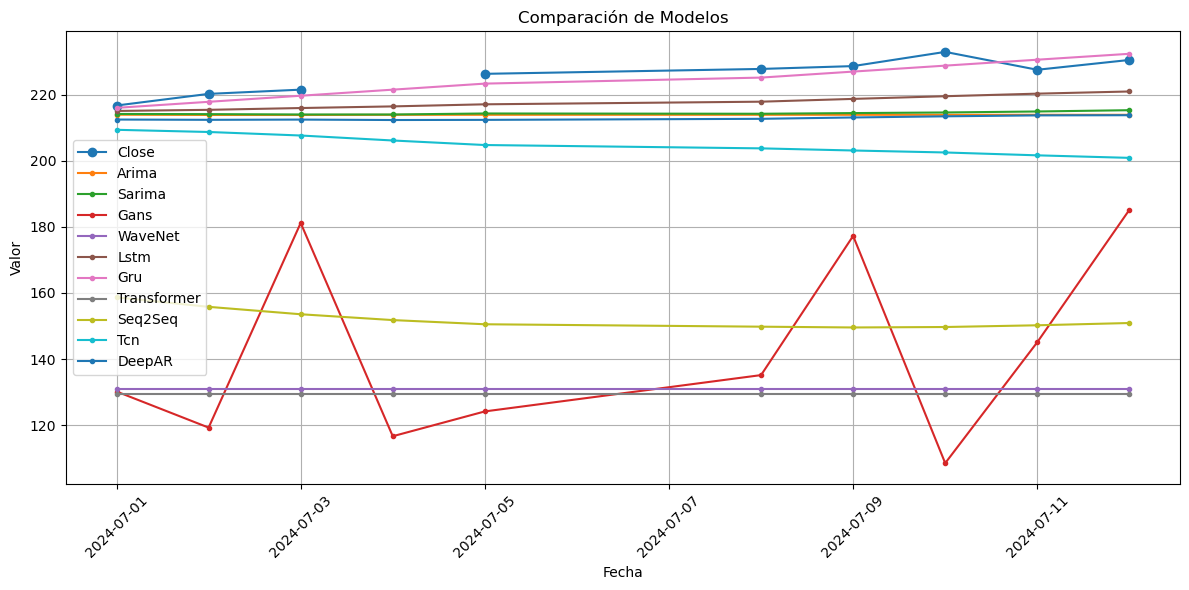

In [393]:
import matplotlib.pyplot as plt
# Configurar el gráfico
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Graficar cada serie de datos
plt.plot(merged_df['Date'], merged_df['Close'], marker='o', label='Close')
plt.plot(merged_df['Date'], merged_df['Arima'], marker='.', label='Arima')
plt.plot(merged_df['Date'], merged_df['Sarima'], marker='.', label='Sarima')
plt.plot(merged_df['Date'], merged_df['Gans'], marker='.', label='Gans')
plt.plot(merged_df['Date'], merged_df['WaveNet'], marker='.', label='WaveNet')
plt.plot(merged_df['Date'], merged_df['Lstm'], marker='.', label='Lstm')
plt.plot(merged_df['Date'], merged_df['Gru'], marker='.', label='Gru')
plt.plot(merged_df['Date'], merged_df['Transformer'], marker='.', label='Transformer')
plt.plot(merged_df['Date'], merged_df['Seq2Seq'], marker='.', label='Seq2Seq')
plt.plot(merged_df['Date'], merged_df['Tcn'], marker='.', label='Tcn')
plt.plot(merged_df['Date'], merged_df['DeepAR'], marker='.', label='DeepAR')

# Personalización del gráfico
plt.title('Comparación de Modelos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Crear un DataFrame con datos faltantes
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [2, np.nan, 3, 4, 5],
    'Feature3': [np.nan, 2, 3, np.nan, 5],
    'Target': [0, 1, 0, 1, 0]  # Variable de destino (target)
}

df = pd.DataFrame(data)
print("Datos originales con valores faltantes:")
print(df)


Datos originales con valores faltantes:
   Feature1  Feature2  Feature3  Target
0       1.0       2.0       NaN       0
1       2.0       NaN       2.0       1
2       NaN       3.0       3.0       0
3       4.0       4.0       NaN       1
4       5.0       5.0       5.0       0


In [2]:
from fancyimpute import IterativeImputer

# Separar características y variable objetivo
X = df.drop(columns=['Target'])
y = df['Target']

# Imputar los valores faltantes usando MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
X_imputed = mice_imputer.fit_transform(X)

# Crear un nuevo DataFrame con los datos imputados
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)
df_imputed['Target'] = y.values

print("\nDatos imputados:")
print(df_imputed)



Datos imputados:
   Feature1  Feature2  Feature3  Target
0  1.000000  2.000000  0.974213       0
1  2.000000  2.589995  2.000000       1
2  2.956637  3.000000  3.000000       0
3  4.000000  4.000000  4.023784       1
4  5.000000  5.000000  5.000000       0
